# Analyzing Data with Python - Final Assignment

**Note**: this is a slightly improved version of the notebook I submitted. I only made changes that would make it more coherent and easier to read (e.g. rounding to the third decimal place, markdown text between questions etc).

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('dark')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

We can now import the dataset as a Pandas DataFrame by using the `read_csv()` method:

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')
print ('DataFrame ready!')

DataFrame ready!


The `head()` method allows us to display the first 5 rows/instances:

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<br>

## Question 1: 

Display the data type of each column:

In [4]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Alternatively, we could use the `info()` method which prints a concise summary of the dataframe:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


Thankfully, there are no missing values!

<br>

## Question 2:

Use the `groupby()` method to get the number of wine servings per continent:

In [6]:
df_wine = df[['wine_servings', 'continent']]
df_wine_grouped = df_wine.groupby(['continent']).sum()
df_wine_grouped.sort_values(by = 'wine_servings', ascending = False)

,wine_servings
continent,
Europe,6400
Africa,862
South America,749
Oceania,570
North America,564
Asia,399


Europe is by far the largest consumer of wine with a total number of wine servings equal to 6,400. The second continent on this list, Africa, has a total consumption of only 862 glasses.

Let's find the first 10 countries in wine consumption:

In [7]:
df.sort_values(by = 'wine_servings', ascending = False)[['country', 'wine_servings']].head(10)

,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278
156,Slovenia,276
99,Luxembourg,271
42,Croatia,254
83,Italy,237
55,Equatorial Guinea,233


9/10 of these countries are in Europe! The French consume more wine than people in any other country with 370 glasses of wine per person per year. Portugal follows closely with 339 glasses. Personally, I expected Italy (#9) to be higher given the worldwide status of Italian wine. 

<br>

## Question 3:

Perform a statistical summary and analysis of beer servings for each continent:

In [8]:
df_beer = df[['beer_servings','continent']]
df_beer.groupby(['continent']).describe()

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                              
                  75%    max  
continent                     
Africa          76.00  376.0  
Asia            60.50  247.0  
Europe         270.00  361.0  
North America  198.00  285.0  
Oceania        125.75  306.0  
South America  198.00  333.0

Europe has the highest mean (and median) value for beer servings, while Asia has the lowest. We should note that many Asian countries are Islamic, therefore there might be laws restraining alcohol consumption.

The world’s biggest beer-drinking country is in Africa and consumes 376 12-ounce cans of beer per person. The country is:

In [9]:
df.iloc[df['beer_servings'].idxmax()]['country']

'Namibia'

<br>

## Question 4:

Use the function `boxplot` in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent:

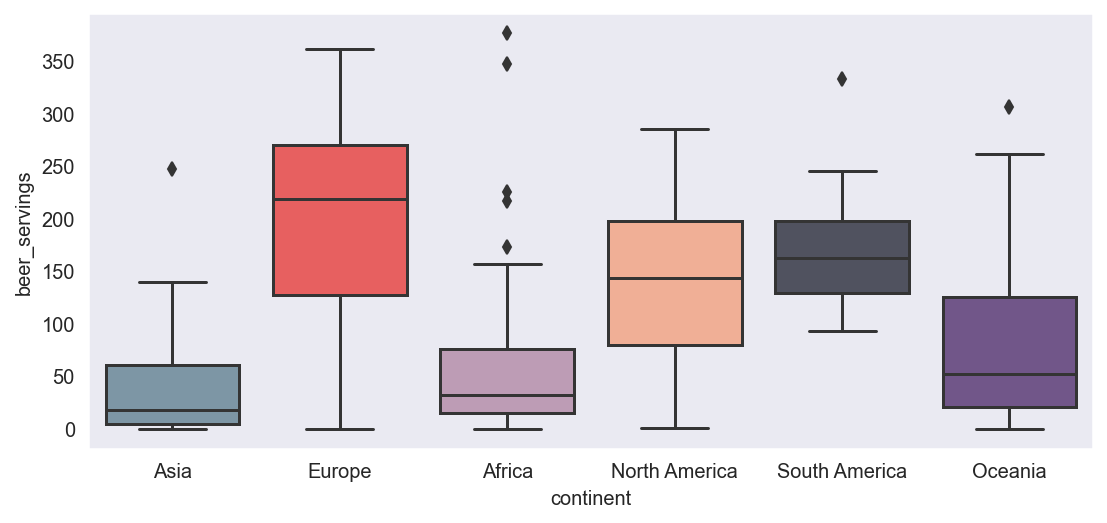

In [10]:
colors = ['#7798AB', '#FE4A49', '#C297B8', '#FFA987', '#4D5061', '#724E91']

plt.figure(figsize = (9, 4))
sns.boxplot(x = 'continent', y = 'beer_servings', data = df, palette = colors);

This type of chart offers a great way to visualize the last five columns of the previous table  and gives a good indication of how the values are spread out. For example, beer servings in Europe range from 0 all the way to 360 cans. On the other hand, South America ranges from 93 to 245 (Venezuela is an 'outlier' with a value equal to 333).

<br>

## Question 5:

Use the function  `regplot` in the seaborn library to determine if the number of wine servings is negatively or positively correlated with the number of beer servings:

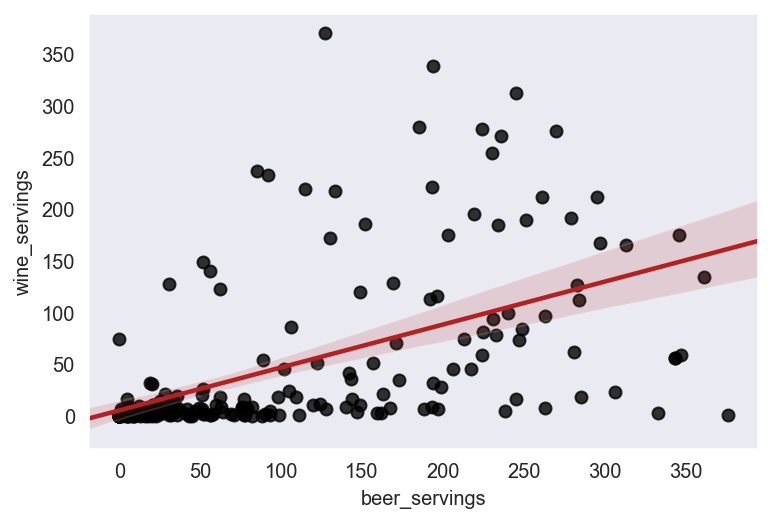

In [11]:
sns.regplot(x = 'beer_servings', y = 'wine_servings', data = df,
           scatter_kws = {'color': 'black'}, line_kws = {'color': 'firebrick'});

Beer servings and wine servings appear to be positively correlated. We can quantify it by using the `corr()` method (calculates the Pearson correlation coefficient):

In [12]:
df[['beer_servings', 'wine_servings']].corr()

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


Therefore, there is moderate positive correlation.

<br>

## Question 6:

Fit a linear regression model to predict the 'total_litres_of_pure_alcohol' using the number of 'wine_servings', then calculate the coefficient of determination, R^2:

In [13]:
X = df[['wine_servings']]
y = df['total_litres_of_pure_alcohol']

lm = LinearRegression()                    # Creates a linear regression object
lm.fit(X, y)                               # Trains the model using X and y

print('R^2 =', np.round(lm.score(X, y), 3))

R^2 = 0.446


An R^2 of around 0.45 is not very good. Let's see if we can improve it.

<br>

## Question 7: 

Use the list of features to predict the 'total_litres_of_pure_alcohol', split the data into training and testing and determine the R^2 on the test data:

In [14]:
list_of_features = ['beer_servings', 'spirit_servings', 'wine_servings']

X = df[list_of_features]
y = df['total_litres_of_pure_alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # Splits the data into training/test sets
print('    Number of test samples:', X_test.size)
print('Number of training samples:', X_train.size)

    Number of test samples: 117
Number of training samples: 462


In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('Training set - R^2 =', np.round(lm.score(X_train, y_train), 3))
print ('    Test set - R^2 =', np.round(lm.score(X_test, y_test), 3))

Training set - R^2 = 0.9
    Test set - R^2 = 0.732


Using the full list of features increased R^2! 

Note that R^2 is significantly higher in the training set, indicating a higher performance on the training set compared to the test set. This discrepancy is the hallmark of an overfitting model.

Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. Fortunately, there are a few things we can do to decrease it.

<br>

## Question 8:

Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using the test data:

In [16]:
Input = [('Scale', StandardScaler()),
         ('Polynomial', PolynomialFeatures(include_bias = False)),
         ('Model', LinearRegression())]

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('Model', LinearRegression())])

In [17]:
pipe.fit(X_train, y_train)

print ('Training set - R^2 =', np.round(pipe.score(X_train, y_train), 3))
print ('    Test set - R^2 =', np.round(pipe.score(X_test, y_test), 3))

Training set - R^2 = 0.915
    Test set - R^2 = 0.741


Our pipeline slightly improved the score both on the training and the test set. However, overfitting is still present.  

We could try reducing overfitting by constraining the model. This is called regularization.

Ridge Regression is a regularized version of Linear Regression, in which the model not only fits the data but also keeps the model weights as small as possible.

<br>

## Question 9:

Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data:

In [18]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train, y_train)

print ('Training set - R^2 =', np.round(RidgeModel.score(X_train, y_train), 3))
print ('   Test Data - R^2 =', np.round(RidgeModel.score(X_test, y_test), 3))

Training set - R^2 = 0.9
   Test Data - R^2 = 0.732


 Unfortunately, Ridge Regression didn't help us.

<br>

## Question 10:

Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the R^2 utilizing the test data provided:

In [19]:
pr = PolynomialFeatures(degree = 2)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

poly = Ridge(alpha = 0.1)
poly.fit(X_train_pr, y_train)

print ('Training set - R^2 =', np.round(poly.score(X_train_pr, y_train), 3))
print ('    Test set - R^2 =', np.round(poly.score(X_test_pr, y_test), 3))

Training set - R^2 = 0.915
    Test set - R^2 = 0.741


Both scores increased yet again, but overfitting is still there. 

<br>

In general, overfitting can be reduced by:

1) Simplifying or constraining the model, <br>
2) Gathering more training data, or <br>
3) Reducing the noise in the training data. <br>

We have tried Point #1. There are other regularized algorithms, however, I don't expect a massive improvement. Point #2 is impossible, since we can't generate more training data (we already have all countries). The dataset appears relatively clean, so I don't think Point #3 is applicable in our case.

<br>

---

## Conclusions

Our notebook came to an end! We performed some basic/preliminary (some might say superficial) EDA, followed by predictions on the total litres of pure alcohol.

It's certainly not a complete analysis since there are many things we can improve. However, I believe it fulfills its purpose as a way of testing a student's understanding of a typical Machine Learning workflow.